In [2]:
import matplotlib
%matplotlib inline
from pylab import *
import caesar
import h5py, os, sys
import yt, pickle
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic as bst
from scipy.stats import binned_statistic_2d as bst2
from scipy.signal import savgol_filter as sgf

matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18

safecolor={
    'silver':"#c0c0c0",
    'gray':"#808080",
    'black':"#000000",
    'red':"#ff0000",
    'maroon':"#800000",
    'yellow':"#ffff00",
    'olive':"#707030",
    'lime':"#00ee00",
    'green':"#009000",
    'aqua':"#00eeee",
    'teal':"#00a0a0",
    'blue':"#0000ff",
    'nave':"#000080",
    'fuchsia':"#ff00ff",
    'purple':"#900090"
}

/home2/weiguang/.local/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home2/weiguang/.config/yt/ytrc is deprecated in favor of /home2/weiguang/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [3]:
d=caesar.load('/home2/weiguang/data6/CL300_Caesar/NewMDCLUSTER_0039/Caesar_snap_128.hdf5')

yt : [INFO     ] 2022-02-19 11:39:52,867 Opening /home2/weiguang/data6/CL300_Caesar/NewMDCLUSTER_0039/Caesar_snap_128.hdf5
yt : [INFO     ] 2022-02-19 11:39:53,350 Found 2438 halos
yt : [INFO     ] 2022-02-19 11:39:53,609 Found 1863 galaxies


In [16]:
d.galaxies[0].info()

{'GroupID': 0,
 'L_FIR': 0.0 Lsun,
 'absmag': {'2mass_h': -26.51278305053711,
            '2mass_j': -26.261674880981445,
            '2mass_ks': -26.286256790161133,
            'b': -24.04777717590332,
            'bessell_l': -25.588058471679688,
            'bessell_lp': -25.47928237915039,
            'bessell_m': -25.012083053588867,
            'buser_b': -24.122468948364258,
            'cfht_b': -24.156972885131836,
            'cfht_i': -25.739572525024414,
            'cfht_r': -25.27271842956543,
            'cousins_i': -25.679079055786133,
            'cousins_r': -25.27042579650879,
            'des_g': -24.442075729370117,
            'des_i': -25.626934051513672,
            'des_r': -25.202320098876953,
            'des_y': -26.12178611755371,
            'des_z': -25.97773551940918,
            'fors_r': -25.265975952148438,
            'fors_v': -24.892784118652344,
            'galex_fuv': -19.99109649658203,
            'galex_nuv': -20.33582878112793,
           

In [3]:
d.halos[0].info()

{'GroupID': 0,
 'ages': {'mass_weighted': 8.959420204162598 Gyr,
          'metal_weighted': 552048185573376.0 Gyr},
 'bh_fedd': 0.0 dimensionless,
 'bhlist_end': 11483,
 'bhlist_start': 0,
 'bhmdot': 0.0 Msun/yr,
 'central_galaxy': <caesar.loader.Galaxy object at 0x14d8b78d25c0>,
 'child': False,
 'contamination': {'r200': 0.006671818429191804 dimensionless,
                   'r200c': 0.0024689084356276834 dimensionless,
                   'r2500c': 0.0005301047883893557 dimensionless,
                   'r500c': 0.0010308840492535393 dimensionless},
 'dmlist_end': 2917804,
 'dmlist_start': 0,
 'galaxy_index_list_end': 251,
 'galaxy_index_list_start': 0,
 'glist_end': 2331451,
 'glist_start': 0,
 'local_mass_density': {'1000': 1493679.802354093 Msun/kpccm**3,
                        '300': 55321474.1612627 Msun/kpccm**3,
                        '3000': 55321.4741612627 Msun/kpccm**3},
 'local_number_density': {'1000': 2.38732414637843e-10 kpccm**(-3),
                          '300':

In [20]:
d.galaxies[0].bhlist,np.log10(d.galaxies[0].masses['bh']),d.galaxies[0].pos*0.6777,d.galaxies[0].minpotpos*0.6777,

(array([3339, 3340,   99,  438,  439,   94,   93,  599,  600,  601,  602,
         603,  884,  885, 1166, 1176, 3720, 3721, 3722, 3719, 3718, 3717]),
 array(10.89522001),
 YTArray([500649.47724375, 500398.1776125 , 500559.4702125 ]) kpccm,
 YTArray([500651.4679875 , 500400.93076875, 500562.13865625]) kpccm)

In [22]:
from pygadgetreader import *

pmass = readsnap('/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0039/snap_128.hdf5','BH_Mass','bndry',units=1,suppress=1)/0.6777
ppos= readsnap('/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0039/snap_128.hdf5','Coordinates','bndry',units=1,suppress=1)/0.6777
pmass[d.galaxies[0].bhlist], np.sqrt(np.sum((ppos[d.galaxies[0].bhlist]-d.galaxies[0].minpotpos.value)**2,axis=1))

(array([1.4755791e-05, 2.0557165e-05, 1.4755791e-05, 2.9511582e-05,
        2.9511582e-05, 1.4755791e-05, 5.3982502e-03, 1.4755791e-05,
        2.9511582e-05, 1.4755791e-05, 4.4267374e-05, 2.9511582e-05,
        1.4755791e-05, 7.8563352e+00, 1.4755791e-05, 4.4267374e-05,
        8.8534747e-05, 1.4755791e-05, 1.4755791e-05, 1.4755791e-05,
        1.4755791e-05, 1.4755791e-05], dtype=float32),
 array([ 54.52128311,  59.14953904,  88.0121618 ,  61.78560461,
         41.9578006 ,  89.38754283, 121.78908831,  50.74665168,
         69.94654767,  90.92259328,  53.32066907, 110.44068332,
         22.82696459,   0.28641098,  72.49550094,  88.10972829,
         99.2947396 , 107.10510682,  81.39825417,  86.99474661,
         76.28505854,  84.66461868]))

In [38]:
c_gpos=np.array([k.minpotpos for k in d.galaxies])

In [23]:
ahf_cc=np.array([5.00609134e+05, 5.00438705e+05, 5.00552129e+05])/0.6777
np.sqrt(np.sum((ahf_cc-d.galaxies[0].minpotpos.value)**2))

85.01247190587728

In [24]:
np.sqrt(np.sum((ahf_cc-ppos[d.galaxies[0].bhlist[pmass[d.galaxies[0].bhlist].argmax()]])**2))

85.0203570181415

In [40]:
rr_cc=np.sqrt(np.sum((c_gpos-ahf_cc)**2,axis=1))

In [45]:
c_gpos[rr_cc.argmin()],ahf_cc,rr_cc.argmin()

(array([738503.125 , 738414.875 , 738491.5625]),
 array([738501.30465498, 738421.77515063, 738491.08800419]),
 1)

In [46]:
d.galaxies[1].bhlist

array([ 514,  513, 2954, 2953, 2949, 2948, 2947, 2370,  122,  121,  123,
       1161, 1677, 1676, 1675, 1160])

In [47]:
pmass[d.galaxies[1].bhlist]

array([1.4755791e-05, 2.9511582e-05, 1.9409091e+00, 1.3283583e-04,
       1.4755791e-05, 4.4267374e-05, 5.9023165e-05, 1.4755791e-05,
       1.4992660e-05, 9.2470196e-05, 1.4755791e-05, 1.4755791e-05,
       9.1926471e-05, 5.3505983e+00, 1.4755791e-05, 4.4267374e-05],
      dtype=float32)

In [50]:
np.sqrt(np.sum((ppos[d.galaxies[1].bhlist]-ahf_cc)**2,axis=1))

array([43.57201658, 35.35498049, 44.36023984, 63.67854386, 76.72106801,
       56.3369222 , 67.28684145, 55.9283872 , 38.18377424, 45.3714014 ,
       45.51582458, 39.63334931, 71.4011973 ,  7.1215518 , 21.79798089,
       51.07919713])

In [29]:
pmass[d.galaxies[0].bhlist]

array([1.4755791e-05, 5.9023165e-05, 1.6330943e-05, 1.4755791e-05,
       2.7052426e+00, 7.3778960e-05, 4.4267374e-05], dtype=float32)

In [51]:
from readsnapsgl import readsnap as myrsnap

In [53]:
mypos = myrsnap('/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5', "Coordinates",quiet=True,ptype=5)
mymas = myrsnap('/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5', "BH_Mass",quiet=True,ptype=5)

In [66]:
mypos.shape

(3332, 3)

In [55]:
rr2=np.sqrt(np.sum((mypos-ahf_cc*0.6777)**2,axis=1))

In [56]:
mymas[rr2<30].max()

3.6261003

In [58]:
mtree = cKDTree(mypos)

In [62]:
idlist = mtree.query_ball_point(ahf_cc*0.6777, 30,w)

In [69]:
import scipy
scipy.__version__,scipy.__path__

('1.5.3', ['/home2/weiguang/.local/lib/python3.8/site-packages/scipy'])

In [63]:
mymas[idlist].max()

3.6261003

In [4]:
# prepare the data for GIZMO plot
if os.path.isfile('./data/BH-relations.txt'):
    GSC_bh=np.loadtxt('./data/BH-relations.txt')
else:
    GSC_bh=[]  # rid, hid, M200, M500, M*, vd, Mbh

    sn=128
    for i in np.arange(1,325):
        buf = '/home2/weiguang/data6/Gizmo-Simba/NewMDCLUSTER_%04d/CaesarGroups_%03d.hdf5' % (i,sn)
        d=caesar.load(buf)

        for j in range(len(d.halos)):
            if (d.halos[j].virial_quantities['m200c'] > 1.0e13) & (d.halos[j].central_galaxy is not None) & (d.halos[j].contamination['r200c']<0.01):
                GSC_bh.append([i, j, d.halos[j].virial_quantities['m200c'], d.halos[j].virial_quantities['m500c'], 
                               d.halos[j].central_galaxy.masses['stellar'], d.halos[j].central_galaxy.velocity_dispersions['stellar'],
                               d.halos[j].central_galaxy.masses['bh']])
    GSC_bh=np.asarray(GSC_bh)
    np.savetxt('./data/BH-relations.txt', GSC_bh, header='# rid, hid, M200, M500, M*, vd, Mbh in unit of Msun!')

In [5]:
# load GadgetX
GX_bh=np.load('data/G3X_Mbh_snap_128-with_BH-info.npy')
# ReginIDs[0] HIDs[1] Mvir(2) Xc-Zc(3-5) Rvir(6) fMhires(7) cNFW (8) Mgas200[9] M*200[10] M500[11] R500[12] fgas500[13] f*500[14] BCG30[15], 50[16], 0.1R500[17]
# sigma_* s30[18], s50[19], s0.1[20]
# add this three columns: MaxM_BH 30kpc[21] 50kpc[22] 0.1R500[23]; total BH 30kpc[24] 50kpc[25] 0.1R500[26]
GX_bh.shape

(5312, 28)

In [6]:
# load GIZMO
GS_bh=np.load('data/GIZMO_Mbh_snap_128-with_BH-info.npy')
GS_bh.shape
##ReginIDs[0] HIDs[1] HostID[2] Mvir(3) Xc(4)   Yc(5)   Zc(6)  Rvir(7) fMhires(8) cNFW (9) Mgas200[10] M*200[11] M500[12]  R500[13] fgas500[14] f*500[15]
## need to add M*30[16] M*50[17] M*0.1R500[18] sigma_* s30[19], s50[20], s0.1[21]  
#  MaxM_BH 30kpc[22] 50kpc[23] 0.1R500[24]; radius to center BH 30kpc[25] 50kpc[26] 0.1R500[27]

(4793, 28)

In [6]:
x=np.arange(10.5,12,0.1)
1.07*np.log10(10**x/5e10)-3.06+x

array([ 7.2271021,  7.4341021,  7.6411021,  7.8481021,  8.0551021,
        8.2621021,  8.4691021,  8.6761021,  8.8831021,  9.0901021,
        9.2971021,  9.5041021,  9.7111021,  9.9181021, 10.1251021])

NameError: name 'GSC_bh' is not defined

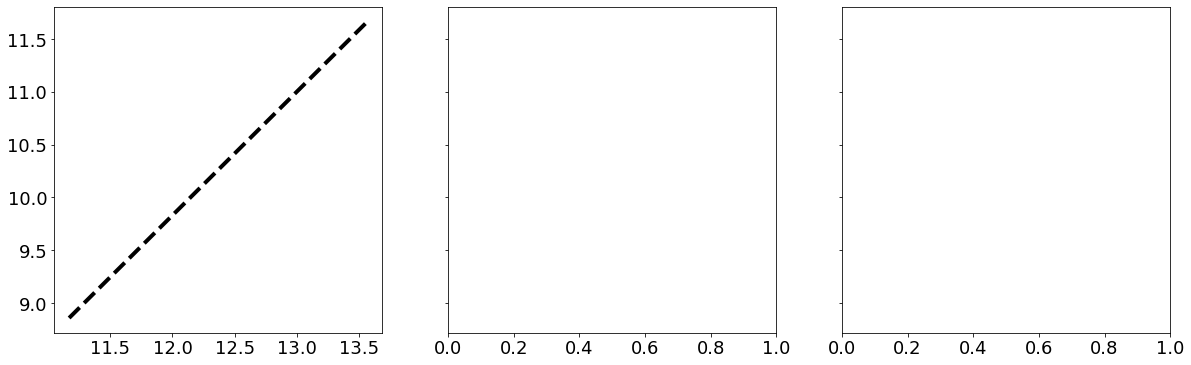

In [4]:
nbnz=15

f, (ax1, ax2, ax3) = subplots(1, 3, sharey=True, figsize=(20,6))

x=np.arange(11,13.5,0.1)
ax1.plot(np.log10(10**x/0.6777), np.log10(10**(1.17*(x-11) -0.31 +9)/0.6777), 'k--', lw=4, label='KH2013 fit m=%5.2f, c=%5.2f'%(1.17, -0.310)) # Mbh - M*

ids=(GSC_bh[:,4]>10)&(GSC_bh[:, -1]>1)
x=np.log10(GSC_bh[ids,4])
myp=np.log10(GSC_bh[ids, -1])
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8, label="GIZMO-SIMBA")

# G3X
ids=(GX_bh[:,16]>1)&(GX_bh[:, 19]>1)
x=np.log10(GX_bh[ids,16]/0.6777)
myp=np.log10(GX_bh[ids, 19]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='*',color=safecolor['blue'],lw=2,ls="--", ms=8,zorder=8, label="GADGET-X")
legend()
ax1.set_xlabel(r'$\log M_*\ [M_{\odot}]$', fontsize=20)
ax1.set_ylabel(r'$\log M_\bullet\ [M_{\odot}]$', fontsize=20)
# Mbh - sigma


# Mbh - Mhalo
x=np.arange(13,15.5,0.1)
ax3.plot(np.log10(10**x/0.6777), np.log10(10.**((x-13)*1.55 -0.82+9)/0.6777), 'k--', lw=4, label='BCS2009 fit m=%5.2f, c=%5.2f'%(1.55, -0.82),zorder=-9)#Mbh-Mhalo

ids=(GSC_bh[:,3]>10)&(GSC_bh[:, -1]>1)
x=np.log10(GSC_bh[ids,3])
myp=np.log10(GSC_bh[ids, -1])
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax3.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8, label="GIZMO-SIMBA")

ids=(GX_bh[:,11]>1)&(GX_bh[:, 19]>1)
x=np.log10(GX_bh[ids,11]*1.0e10/0.6777)
myp=np.log10(GX_bh[ids, 19]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax3.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='*',color=safecolor['blue'],lw=2,ls="--", ms=8,zorder=8, label="GADGET-X")
legend()
ax3.set_xlabel(r'$\log M_{500c}\ [M_{\odot}]$', fontsize=20)

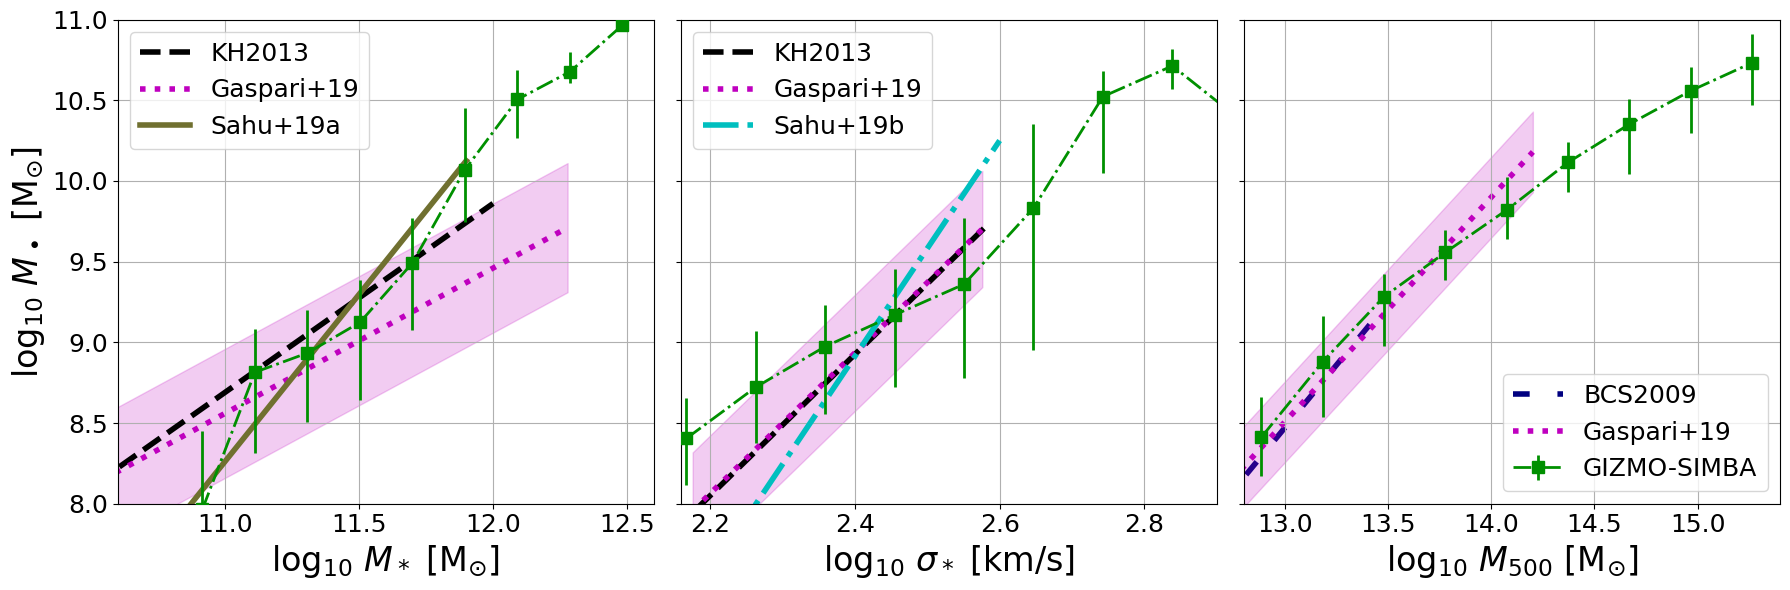

In [10]:
nbnz=9

f, (ax1, ax2, ax3) = subplots(1, 3, sharey=True, figsize=(18,6))

x=np.arange(np.log10(1e9),np.log10(1.1e12),0.1)
ax1.plot(x, np.log10((10**x/1e11)**1.17*0.49*1e9), 'k--', lw=4, label='KH2013') # KH13 Mbh - M* eq 10  fit m=%5.2f, c=%5.2f %(1.17, 0.49)
# ax1.plot(x, np.log10(10**x/10**10.81)*1.04+8.56, 'g-', lw=4, label='Savorgnan+16')  #8.56 0.0  7 1.04 0.10  1010.81
x=np.arange(np.log10(6e9),np.log10(2e12),0.1)  
ax1.plot(x, np.log10(10**x/1e11)*0.9+8.56, 'm:', lw=4, label='Gaspari+19') #Gaspari+19 table 1 scatter 0.4 fit m=%5.2f, c=%5.2f %(0.9, 8.56)
ax1.fill_between(x, np.log10(10**x/1e11)*0.9+8.56-0.4, np.log10(10**x/1e11)*0.9+8.56+0.4,color='m',alpha=0.2)
x=np.arange(10.5,12,0.1)
ax1.plot(x, 1.07*np.log10(10**x/5e10)-3.06+x, '-', color=safecolor['olive'],lw=4, label='Sahu+19a') #Sahu+19 table 5 40 ETGs without a Disk (E): 
# alpha: 1.07 ± 0.08; beta: −3.06 ± 0.10


ids=(GS_bh[:,17]>1)&(GS_bh[:, 23]>1)
x=np.log10(GS_bh[ids,17]/0.6777)
myp=np.log10(GS_bh[ids, 23]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8)#, label="GIZMO-SIMBA")

# G3X
# ids=(GX_bh[:,20]>1)&(GX_bh[:, 23]>1)
# x=np.log10(GX_bh[ids,17]/0.6777)
# myp=np.log10(GX_bh[ids, 23]/0.6777)
# pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
# pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
# pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
# xxz=(be[1:]+be[:-1])/2
# ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
#          marker='*',color=safecolor['blue'],lw=2,ls="--", ms=8,zorder=8, label="GADGET-X")
ax1.legend(fontsize=18)
ax1.set_xlim(10.6,12.6)
ax1.set_xlabel(r'$\log_{10}\ M_*\ [{\rm M}_{\odot}]$', fontsize=24)
ax1.set_ylabel(r'$\log_{10}\ M_\bullet\ [{\rm M}_{\odot}]$', fontsize=24)

# Mbh - sigma
x=np.arange(np.log10(60),np.log10(400),0.1)
ax2.plot(x, np.log10((10.**x/200)**4.38*0.31*1e9), 'k--', lw=4, label='KH2013') # Mbh - M* eq 7 fit m=%5.2f, c=%5.2f'%(4.38, 0.310)
x=np.arange(np.log10(150),np.log10(400),0.1)
ax2.plot(x, x*4.36-1.53, 'm:', lw=4, label='Gaspari+19') # #Gaspari+19 table 1 scatter 0.36
ax2.fill_between(x, x*4.36-1.53-0.36, x*4.36-1.53+0.36,color='m',alpha=0.2)

#McConnell & Ma 2013 log(MBH/M) = A log[σ/200 km s−1] + B. 8.39 ± 0.06 5.20 ± 0.36  Similar to KH13 exclude from comparison.
# x=np.arange(2.0,np.log10(350),0.1) #\log sigma
# ax2.plot(x, 5.2*np.log10(10**x/200) + 8.39, 'k-.', lw=4, label='MM2013')

#Sahu+19b  https://ui.adsabs.harvard.edu/abs/2019ApJ...887...10S/abstract
# Table 2: Galaxies without a disk (E type):  6.69 ± 0.59 8.25 ± 0.10 0
#log (M_BH /M⊙) = 6.69 ± 0.59 * log (σ / 200 km s−1) + 8.25 ± 0.10
x=np.arange(2.0,2.6,0.01)
ax2.plot(x, 6.69*np.log10(10**x/200) + 8.25, 'c-.', lw=4, label='Sahu+19b')

#Dullo, Gil de Paz & Knapen 2020  table 3 [a]
#log (M_BH /M⊙) = (10.67 ± 4.90) * log (σ / 300 km s−1) + (9.48 ± 0.11) 
x=np.arange(np.log10(180),np.log10(400),0.1) #\log sigma
# ax2.plot(x, 10.67*np.log10(10**x/300) + 9.48, 'c-.', lw=4, label='DGK+21')

ids=(GS_bh[:,20]>1)&(GS_bh[:, 23]>1e7)&(GS_bh[:,17]>1e10)
x=np.log10(GS_bh[ids,19])
myp=np.log10(GS_bh[ids, 23]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax2.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8)#, label="GIZMO-SIMBA")
# print(GS_bh[log10(GS_bh[:,20])>3.1, 23])


# G3X
# ids=(GX_bh[:,20]>1)&(GX_bh[:, 23]>1)
# x=np.log10(GX_bh[ids,20])
# myp=np.log10(GX_bh[ids, 23]/0.6777)
# pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
# pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
# pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
# xxz=(be[1:]+be[:-1])/2
# ax2.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
#          marker='*',color=safecolor['blue'],lw=2,ls="--", ms=8,zorder=8, label="GADGET-X")
ax2.legend(fontsize=18,loc=2)
ax2.set_xlim(2.16,2.9)
ax2.set_xlabel(r'$\log_{10}\ \sigma_*$ [km/s]', fontsize=24)
# ax2.set_ylabel(r'$\log M_\bullet\ [M_{\odot}]$', fontsize=20)

# Mbh - Mhalo
x=np.arange(13,13.7,0.1)
ax3.plot(x-0.19, np.log10(10.**((x-13)*1.55 -0.82+9)), color=safecolor['nave'],ls=(0, (3, 5)), lw=4, label='BCS2009',zorder=-9) #Mbh-Mhalo fit m=%5.2f, c=%5.2f'%(1.55, -0.82)
# @ARTICLE{2009ApJ...704.1135B, author = {{Bandara}, Kaushala and {Crampton}, David and {Simard}, Luc}, M200
x=np.arange(np.log10(2e12),np.log10(8e14),0.1)
idss=np.where((x*1.39-9.56)<np.log10(2e10))[0]
ax3.plot(x[idss], x[idss]*1.39-9.56, 'm:', lw=4, label='Gaspari+19',zorder=-9) #Mbh-Mhalo scatter 0.25 fit m=%5.2f, c=%5.2f'%(1.39, -9.56)
ax3.fill_between(x[idss], x[idss]*1.39-9.56-0.25,x[idss]*1.39-9.56+0.25,color='m',alpha=0.2)
# similar results Bogdan et al. 2018

ids=(GS_bh[:,12]>1)&(GS_bh[:, 23]>1)
x=np.log10(GS_bh[ids,12]/0.6777)
myp=np.log10(GS_bh[ids, 23]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax3.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8, label="GIZMO-SIMBA")


# ids=(GX_bh[:,12]>1)&(GX_bh[:, 23]>1)
# x=np.log10(GX_bh[ids,12]*1.0e10/0.6777)
# myp=np.log10(GX_bh[ids, 23]/0.6777)
# pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
# pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
# pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
# xxz=(be[1:]+be[:-1])/2
# ax3.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
#          marker='*',color=safecolor['blue'],lw=2,ls="--", ms=8,zorder=8, label="GADGET-X")
ax3.legend(fontsize=18,loc=4)
ax3.set_xlim(12.8,15.4)
ax3.set_xlabel(r'$\log_{10}\ M_{500}\ [{\rm M}_{\odot}]$', fontsize=24)
ax3.set_ylim(8,11.)
ax3.grid()
ax2.grid()
ax1.grid()
tight_layout()
f.savefig('plots/Mbh-Msh.pdf',dpi=300)

In [115]:
Ms50=np.zeros(324*1000,dtype=np.float32)
Mshsm=np.zeros(324*1000,dtype=np.float32)
Mbh=np.zeros(324*1000,dtype=np.float32)
Sig50=np.zeros(324*1000,dtype=np.float32)
Sighsm=np.zeros(324*1000,dtype=np.float32)
N=0
path='/home2/weiguang/data6/CL300_Caesar/'
for i in np.arange(1,325):
    ds=caesar.load(path+'NewMDCLUSTER_%04d/Caesar_snap_128.hdf5'%i)
    gm50=np.array([j.masses['star_50kpc'] for j in ds.galaxies if j.masses['star_50kpc']>5e10])
    gmhm=np.array([j.masses['star_stellar_half_mass_radius'] for j in ds.galaxies if j.masses['star_50kpc']>5e10])
    gmbh=np.array([j.masses['bh'] for j in ds.galaxies if j.masses['star_50kpc']>5e10])
    sg50=np.array([j.velocity_dispersions['star_50kpc'] for j in ds.galaxies if j.masses['star_50kpc']>5e10])
    sghm=np.array([j.velocity_dispersions['star_stellar_half_mass_radius'] for j in ds.galaxies if j.masses['star_50kpc']>5e10])
    
    tn=len(gm50)
    Ms50[N:N+tn]=gm50
    Mshsm[N:N+tn]=gmhm
    Mbh[N:N+tn]=gmbh
    Sig50[N:N+tn]=sg50
    Sighsm[N:N+tn]=sghm
    N+=tn
Ms50=Ms50[:N]
Mshsm=Mshsm[:N]
Mbh=Mbh[:N]
Sig50=Sig50[:N]
Sighsm=Sighsm[:N]
print(N)

yt : [INFO     ] 2021-04-14 22:34:29,810 Opening /home2/weiguang/data6/CL300_Caesar/NewMDCLUSTER_0001/Caesar_snap_128.hdf5
yt : [INFO     ] 2021-04-14 22:34:29,962 Found 2653 halos
yt : [INFO     ] 2021-04-14 22:34:29,970 Found 1786 galaxies
yt : [INFO     ] 2021-04-14 22:34:30,963 Opening /home2/weiguang/data6/CL300_Caesar/NewMDCLUSTER_0002/Caesar_snap_128.hdf5
yt : [INFO     ] 2021-04-14 22:34:31,098 Found 2311 halos
yt : [INFO     ] 2021-04-14 22:34:31,106 Found 1557 galaxies
yt : [INFO     ] 2021-04-14 22:34:31,971 Opening /home2/weiguang/data6/CL300_Caesar/NewMDCLUSTER_0003/Caesar_snap_128.hdf5
yt : [INFO     ] 2021-04-14 22:34:32,107 Found 2881 halos
yt : [INFO     ] 2021-04-14 22:34:32,115 Found 2346 galaxies
yt : [INFO     ] 2021-04-14 22:34:33,395 Opening /home2/weiguang/data6/CL300_Caesar/NewMDCLUSTER_0004/Caesar_snap_128.hdf5
yt : [INFO     ] 2021-04-14 22:34:33,529 Found 2796 halos
yt : [INFO     ] 2021-04-14 22:34:33,538 Found 1992 galaxies
yt : [INFO     ] 2021-04-14 22:3

83512


In [110]:
Mshsm.min()

50001826000.0

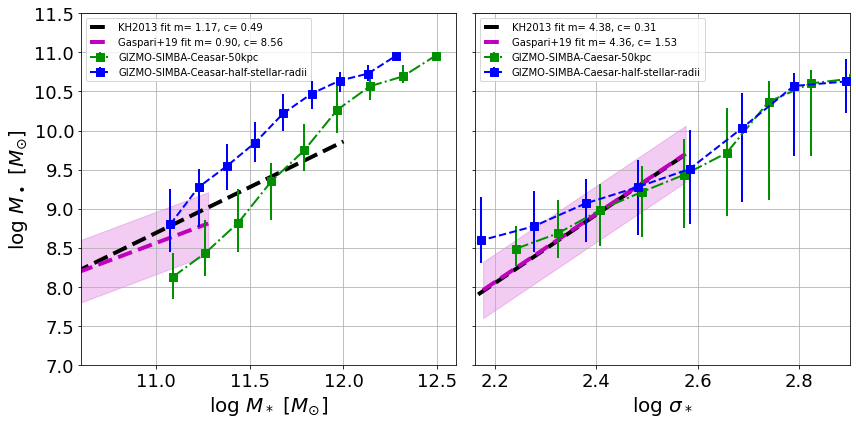

In [120]:
nbnz=9

f, (ax1, ax2) = subplots(1, 2, sharey=True, figsize=(12,6))

x=np.arange(np.log10(1e9),np.log10(1.1e12),0.1)
ax1.plot(x, np.log10((10**x/1e11)**1.17*0.49*1e9), 'k--', lw=4, label='KH2013 fit m=%5.2f, c=%5.2f'%(1.17, 0.49)) # KH13 Mbh - M* eq 10
x=np.arange(np.log10(6e9),np.log10(2e11),0.1)
ax1.plot(x, np.log10(10**x/1e11)*0.9+8.56, 'm--', lw=4, label='Gaspari+19 fit m=%5.2f, c=%5.2f'%(0.9, 8.56)) #Gaspari+19 table 1 scatter 0.4
ax1.fill_between(x, np.log10(10**x/1e11)*0.9+8.56-0.4, np.log10(10**x/1e11)*0.9+8.56+0.4,color='m',alpha=0.2)

ids=(Mbh>1e7)&(Ms50>1e11)
x=np.log10(Ms50[ids])
myp=np.log10(Mbh[ids])
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8, label="GIZMO-SIMBA-Ceasar-50kpc")

ids=(Mbh>1e7)&(Mshsm>1e11)
x=np.log10(Mshsm[ids])
myp=np.log10(Mbh[ids])
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color='b',lw=2,ls="--", ms=8,zorder=8, label="GIZMO-SIMBA-Ceasar-half-stellar-radii")

ax1.legend()
ax1.set_xlim(10.6,12.6)
ax1.set_xlabel(r'$\log\ M_*\ [M_{\odot}]$', fontsize=20)
ax1.set_ylabel(r'$\log\ M_\bullet\ [M_{\odot}]$', fontsize=20)
ax1.grid()

# Mbh - sigma
x=np.arange(np.log10(60),np.log10(400),0.1)
ax2.plot(x, np.log10((10.**x/200)**4.38*0.31*1e9), 'k--', lw=4, label='KH2013 fit m=%5.2f, c=%5.2f'%(4.38, 0.310)) # Mbh - M* eq 7
x=np.arange(np.log10(150),np.log10(400),0.1)
ax2.plot(x, x*4.36-1.53, 'm--', lw=4, label='Gaspari+19 fit m=%5.2f, c=%5.2f'%(4.36, 1.53)) # #Gaspari+19 table 1 scatter 0.36
ax2.fill_between(x, x*4.36-1.53-0.36, x*4.36-1.53+0.36,color='m',alpha=0.2)

ids=(Sig50>0)&(Mbh>1e7)&(Mshsm>1e11)&(Ms50>1e11)
x=np.log10(Sig50[ids])
myp=np.log10(Mbh[ids])
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax2.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8, label="GIZMO-SIMBA-Caesar-50kpc")

ids=(Sighsm>0)&(Mbh>1e7)&(Mshsm>1e11)&(Ms50>1e11)
x=np.log10(Sighsm[ids])
myp=np.log10(Mbh[ids])
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax2.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color='b',lw=2,ls="--", ms=8,zorder=8, label="GIZMO-SIMBA-Caesar-half-stellar-radii")

ax2.legend()
ax2.set_xlim(2.16,2.9)
ax2.set_xlabel(r'$\log\ \sigma_*$', fontsize=20)
ax2.set_ylim(7,11.5)
ax2.grid()
tight_layout()

# Other tests for GadgetX -- drop it!

In [42]:
def sepf(a,b):
    x=np.arange(11,13,0.1)
    return 10**x,10**(a*x+b)

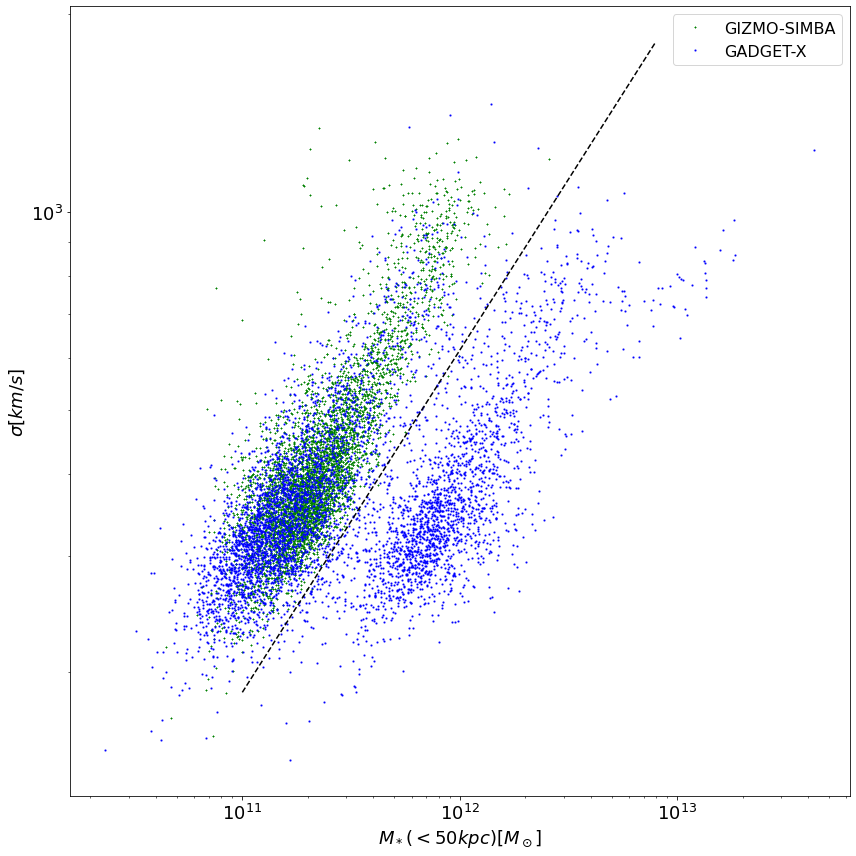

In [52]:
fig=figure(figsize=(12,12))
plot(GS_bh[:,17],GS_bh[:,20],'g+',ms=1.5,label='GIZMO-SIMBA')
plot(GX_bh[:,17],GX_bh[:,20],'bx',ms=1.5,label='GADGET-X')
xscale('log');yscale('log')
x,y=sepf(0.52,-3.45)
plot(x,y,'k--')
xlabel(r'$M_* (<50 kpc) [M_\odot]$',fontsize=18)
ylabel(r'$\sigma [km/s]$',fontsize=18)
legend(fontsize=16)
tight_layout()

In [53]:
idabv=np.log10(GX_bh[:,17])*0.52-3.45-np.log10(GX_bh[:,20])<0

<ipython-input-60-b4dd2ca23f89>:20: RuntimeWarning: divide by zero encountered in log10
  myp=np.log10(GX_bh[idabv, 23]/0.6777)
/home2/weiguang/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:3963: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))
/home2/weiguang/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:3963: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))
/home2/weiguang/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:3963: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))
<ipython-input-60-b4dd2ca23f89>:25: RuntimeWarning: invalid value encountered in subtract
  ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
<ipython-input-60-b4dd2ca23f89>:36: RuntimeWarning: divide by zero encountered in log10
  myp=np.log10(GS_bh[ids, 24]/0.67

[6.55822277e+10 1.23022115e+08 1.99999995e+05 5.70134401e+10]


<ipython-input-60-b4dd2ca23f89>:47: RuntimeWarning: divide by zero encountered in log10
  myp=np.log10(GX_bh[idabv, 23]/0.6777)
/home2/weiguang/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
<ipython-input-60-b4dd2ca23f89>:73: RuntimeWarning: divide by zero encountered in log10
  myp=np.log10(GX_bh[idabv, 23]/0.6777)


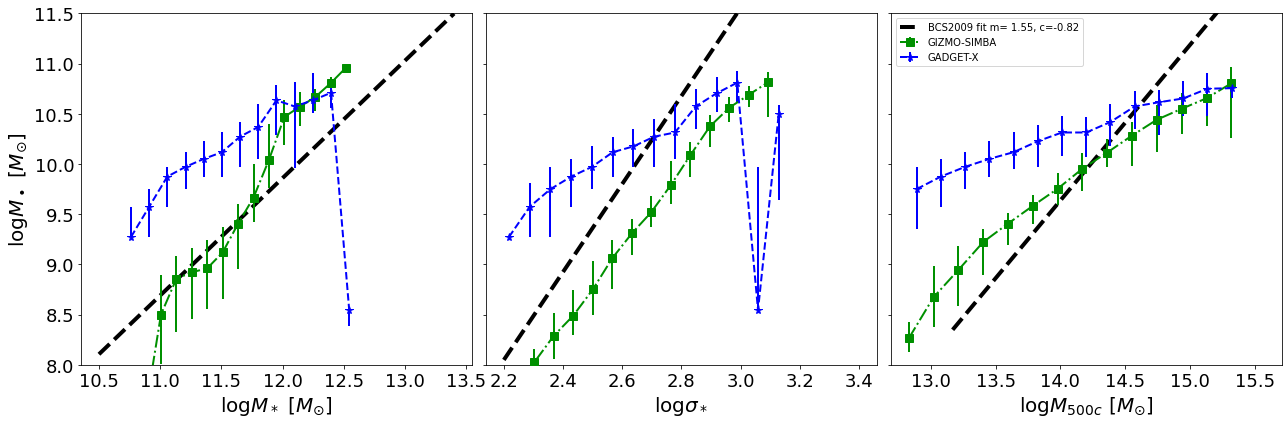

In [60]:
nbnz=14

f, (ax1, ax2, ax3) = subplots(1, 3, sharey=True, figsize=(18,6))

x=np.arange(10.5,13.5,0.1)
ax1.plot(x, np.log10((10**x/1e11)**1.17*0.49*1e9), 'k--', lw=4, label='KH2013 fit m=%5.2f, c=%5.2f'%(1.17, 0.49)) # Mbh - M* eq

ids=(GS_bh[:,17]>1)&(GS_bh[:, 23]>1)
x=np.log10(GS_bh[ids,17]/0.6777)
myp=np.log10(GS_bh[ids, 23]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8, label="GIZMO-SIMBA")

# G3X
x=np.log10(GX_bh[idabv,17]/0.6777)
myp=np.log10(GX_bh[idabv, 23]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax1.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='*',color=safecolor['blue'],lw=2,ls="--", ms=8,zorder=8, label="GADGET-X")
# legend()
ax1.set_xlabel(r'$\log M_*\ [M_{\odot}]$', fontsize=20)
ax1.set_ylabel(r'$\log M_\bullet\ [M_{\odot}]$', fontsize=20)

# Mbh - sigma
x=np.arange(2.2,3.5,0.1)
ax2.plot(x, np.log10((10.**x/200)**4.38*0.31*1e9), 'k--', lw=4, label='KH2013 fit m=%5.2f, c=%5.2f'%(4.38, 0.310)) # Mbh - M* eq 7
ids=(GS_bh[:,20]>1)&(GS_bh[:, 23]>1)
x=np.log10(GS_bh[ids,20])
myp=np.log10(GS_bh[ids, 24]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax2.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8, label="GIZMO-SIMBA")
print(GS_bh[log10(GS_bh[:,20])>3.1, 23])

# G3X
x=np.log10(GX_bh[idabv,20])
myp=np.log10(GX_bh[idabv, 23]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax2.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='*',color=safecolor['blue'],lw=2,ls="--", ms=8,zorder=8, label="GADGET-X")
# legend()
ax2.set_xlabel(r'$\log \sigma_*$', fontsize=20)
# ax2.set_ylabel(r'$\log M_\bullet\ [M_{\odot}]$', fontsize=20)

# Mbh - Mhalo
x=np.arange(13,15.5,0.1)
ax3.plot(np.log10(10**x/0.6777), np.log10(10.**((x-13)*1.55 -0.82+9)/0.6777), 'k--', lw=4, label='BCS2009 fit m=%5.2f, c=%5.2f'%(1.55, -0.82),zorder=-9)#Mbh-Mhalo

ids=(GS_bh[:,12]>1)&(GS_bh[:, 23]>1)
x=np.log10(GS_bh[ids,12]/0.6777)
myp=np.log10(GS_bh[ids, 23]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax3.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color=safecolor['green'],lw=2,ls="-.", ms=8,zorder=8, label="GIZMO-SIMBA")

x=np.log10(GX_bh[idabv,12]*1.0e10/0.6777)
myp=np.log10(GX_bh[idabv, 23]/0.6777)
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
xxz=(be[1:]+be[:-1])/2
ax3.errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='*',color=safecolor['blue'],lw=2,ls="--", ms=8,zorder=8, label="GADGET-X")
legend()
ax3.set_ylim(8,11.5)
ax3.set_xlabel(r'$\log M_{500c}\ [M_{\odot}]$', fontsize=20)
tight_layout()

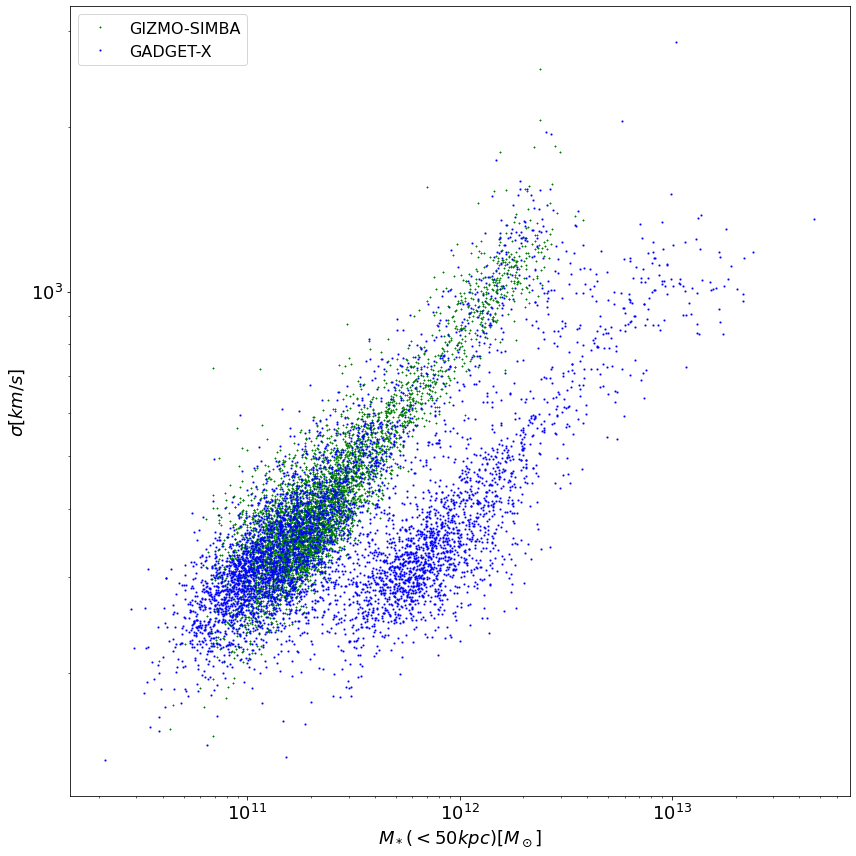

In [40]:
fig=figure(figsize=(12,12))
plot(GS_bh[:,18],GS_bh[:,21],'g+',ms=1.5,label='GIZMO-SIMBA')
plot(GX_bh[:,18],GX_bh[:,21],'bx',ms=1.5,label='GADGET-X')
xscale('log');yscale('log')
xlabel(r'$M_* (<50 kpc) [M_\odot]$',fontsize=18)
ylabel(r'$\sigma [km/s]$',fontsize=18)
legend(fontsize=16)
tight_layout()